#### 1. 앙상블 학습의 대표적인 학습 방법 3가지와 그 방법들 사이의 차이점을 서술하시오. 

답: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)
    보팅과 배깅은 여러개의 classifiers의 예측결과를 종합한뒤 투표를 통해 최종 예측 결과를 결정하는 방법이다. 하지만 보팅은 서로 다른 알고리즘을 가진 classifiers의 결과를 결합하는 반면 배깅은 모두 같은 알고리즘을 가진 classifiers들을 결합하지만 데이터 샘플링(Bootstrapping)을 통해 서로 다른 샘플링 데이터로 학습한 결과를 결합한다. 부스팅은 여러개의 classifiers가 순차적으로 학습을 할때 그 다음으로 학습하는 classifier에 가중치를 주면서 학습을 진행하는 기법이다.  
    

#### 2. 보팅(Voting)의 유형 두가지와 그 들의 차이점을 서술하시오.

하드 보팅(Hard Voting): 다수결의 원칙처럼 다수의 classifiers가 예측한 값을 최종결과로 선택
소프트 보팅(Soft Voting): classifiers의 각 class의 예측확률을 평균내어 가장 높은 값을 가진 class를 최종결과로 선택

#### 3. 랜덤포레스트(Random Forest)의 결과 에측 과정을 간략하게 설명하시오.

여러개의 decision tree들이 전체 데이터에서 bagging 방식으로 각자의 데이터를 샘플링하여 개별적으로 학습한 뒤 최종적으로 각각의 결과들을 모아  voting을 통하여 최종 예측 결과를 결정한다. 이때 데이터 샘플링을 진행할때 매 sub dataset마다 중첩을 허용한다.

#### 4. GBM(Gradient Boosting Machine) 알고리즘에 대해 간단히 설명하시오.

앞 classifier에서 잘못 예측한 데이터에 가중치를 더하여 그 다음 classifier가 오류를 개선하여 학습할 수 있도록 유도하는 알고리즘을
부스팅이라 일컫는다. 부스팅 알고리즘 중에서 가중치 업데이트를 경사 하강법을 이용하는 알고리즘이 GBM이다.

#### 5. XGBoost(eXtra Gradient Boost) 알고리즘애 대해 간략하게 설명하고 GBM 대비 이 알고리즘의 장점에 대해 서술하시오.

GBM에 기반하고 있지만 GBM의 과적합 문제와 느린 수행 시간을 보안시킨 알고리즘이다. 또한 나무 가지치기(tree pruning)와 자체 내장된 교차 검증과 결손값 처리 기능을 통해 성능이 향상 되었다.

#### 6. LightGBM 알고리즘애 대해 간략하게 설명하고 XGBoost 대비 이 알고리즘의 장점에 대해 서술하시오.

LightGBM은 XGBoost보다 학습시간이 더욱 적게 걸린다. 그러나 성능에는 별차이가 없고 적은 데이터 세트에 적용할시에 과적합이 쉽게 발생한다. 
그 이유는 LightGBM이 Leaf Wise 분할 방식을 채택하였기 떄문에 균형 잡힌 트리를 생성하지 않기 때문이다.

#### 7. (Coding Part) titanic.csv 데이터를 기반으로 타이타닉호 승객 생존률을 예측하는 모델을 만들고자 한다.

#####       (a) 생존률과 다른 independent variables 간의 상관관계를 나타내시오. 생존률과 가장 correlation이 높은 두가지 variables은 무엇인가?

In [49]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

#DATA Preparation
df = pd.read_csv("train.csv")
df = df.drop(["PassengerId", "Ticket","Cabin", "Name"], axis=1)
sexdict = {"male":0, "female":1}
df.Sex = df.Sex.replace(sexdict)
df=df.dropna()
df = df.query('Embarked == "C" |Embarked == "S"')
df=pd.get_dummies(df, ["Embarked"])
df.to_csv('titanic.csv')

In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
883,0,2,0,28.0,0,0,10.5000,0,1
884,0,3,0,25.0,0,0,7.0500,0,1
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1


<AxesSubplot:>

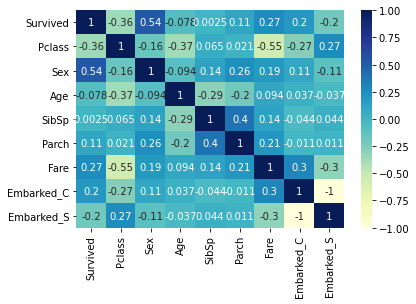

In [15]:
#EDA
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

Higest correlation: Survived vs Sex and Survived vs Pclass

C:\Users\0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survival vs Pclass')

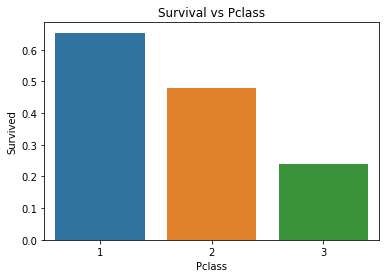

In [16]:
pclass = df.groupby("Pclass").mean()
sns.barplot(pclass.index, pclass.Survived)
plt.title("Survival vs Pclass")


#####       (b) Random Forest 알고리즘을 통해 생존률을 예측하고 모델의 정확도를 나타내시오

In [22]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.
from sklearn.metrics import accuracy_score


training_variables = df.columns.tolist() 
objective_variable = training_variables[0]
del training_variables[0]  
X = df[training_variables]
y = df[objective_variable]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size =0.5)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(478, 8) (478,)
(103, 8) (103,)
(103, 8) (103,)


In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [24]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_test.shape[0], 100 * metrics.accuracy_score(prediction, y_test)))

총 103명 중 78.64% 정확도로 생존을 맞춤


#####       (c) GridSearchCV를 사용하여  최적의 hyper-parameter를 가진 모델을 생성하고 그 모델의 최고 예측 정확도를 나타내시오.

In [29]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.8033


In [37]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth = 10, min_samples_leaf=8, min_samples_split=8,random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:{:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.7670


#####       (d) bar plot을 사용하여 feature importance를 나타내시오.

<function matplotlib.pyplot.show(close=None, block=None)>

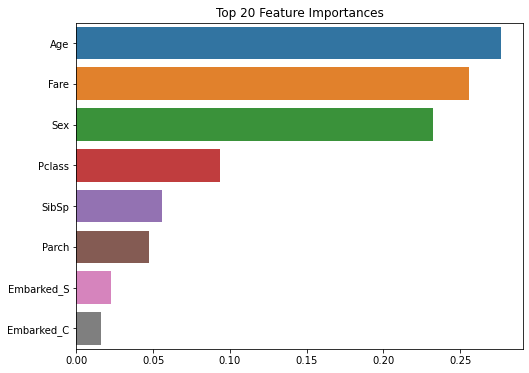

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importance_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[0:20]

plt.figure(figsize= (8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show

#####       (e) XGBoowst 래퍼를 사용하여 생존율을 예측하고 그 모델의 정확도를 나타내시오

In [44]:
!pip install xgboost

In [47]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
evals = [(X_train,y_train)]

xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=True)
prediction = xgb_wrapper.predict(X_test)


[0]	validation_0-logloss:0.64729
[1]	validation_0-logloss:0.60959
[2]	validation_0-logloss:0.57826
[3]	validation_0-logloss:0.55201
[4]	validation_0-logloss:0.52985
[5]	validation_0-logloss:0.51094
[6]	validation_0-logloss:0.49477
[7]	validation_0-logloss:0.48086
[8]	validation_0-logloss:0.46890
[9]	validation_0-logloss:0.45865
[10]	validation_0-logloss:0.44948
[11]	validation_0-logloss:0.44173
[12]	validation_0-logloss:0.43471
[13]	validation_0-logloss:0.42706
[14]	validation_0-logloss:0.42046
[15]	validation_0-logloss:0.41543
[16]	validation_0-logloss:0.41112
[17]	validation_0-logloss:0.40736
[18]	validation_0-logloss:0.40402
[19]	validation_0-logloss:0.40035
[20]	validation_0-logloss:0.39619
[21]	validation_0-logloss:0.39364
[22]	validation_0-logloss:0.38952
[23]	validation_0-logloss:0.38558
[24]	validation_0-logloss:0.38244
[25]	validation_0-logloss:0.38039
[26]	validation_0-logloss:0.37788
[27]	validation_0-logloss:0.37390
[28]	validation_0-logloss:0.37122
[29]	validation_0-loglos

In [48]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_test.shape[0], 100 * metrics.accuracy_score(prediction, y_test)))

총 103명 중 80.58% 정확도로 생존을 맞춤
